### Q1 SOLUTION

In [1]:
import re 
def sort_by_filename( unsortdata ): 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 

    return sorted(sorted(unsortdata, key = lambda x: re.sub('[a-zA-Z0-9]*$', '', x)), key=alphanum)

unsortdata = set(['mallika_1.jpg', 'dog005.jpg', 'grandson_2018_01_01.png', 'dog008.jpg', 'mallika_6.jpg', 
            'grandson_2018_5_23.png', 'dog01.png', 'mallika_11.jpg', 'mallika2.jpg', 'grandson_2018_02_5.png',
            'grandson_2019_08_23.jpg', 'dog9.jpg', 'mallika05.jpg'  ])
for x in sort_by_filename(unsortdata):
    print(x)

dog01.png
dog005.jpg
dog008.jpg
dog9.jpg
grandson_2018_01_01.png
grandson_2018_02_5.png
grandson_2018_5_23.png
grandson_2019_08_23.jpg
mallika2.jpg
mallika05.jpg
mallika_1.jpg
mallika_6.jpg
mallika_11.jpg


### Q3 SOLUTION

In [2]:
from PIL import Image
import pytesseract, re
f = r"C:\Users\91836\Desktop\Testing.jpg"
t = pytesseract.image_to_string(Image.open(f))
location = [x.start() for x in re.finditer('Tumkur', t,re.IGNORECASE)]
for y in location:
    print(t[y:min(y+124,len(t))])

Tumkur Road

AVAILABLE.
INDUSTRIAL/
Warehouse.
Nelamangala
Dobespet. 1 to 100
acres, 1000 to
1,00,000 saft. NAIK:
9141326819


### Q2 SOLUTION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from nltk.corpus import stopwords
import re,os, random
from sklearn.metrics import f1_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#### Loading the dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/nishant0819/CorporateDataset/master/Q2_data_set%20-%20Q2_data_set.csv")
print(df.shape,"\n")
print("Null in the dataset:\n",df.isnull().sum(axis=0))
print("\nTotal Null value in the dataset: ", df.isnull().sum(axis=0).sum())
df.head()

(20000, 12) 

Null in the dataset:
 CORPORATE_IDENTIFICATION_NUMBER      0
COMPANY_NAME                         0
COMPANY_STATUS                       0
COMPANY_CLASS                        0
COMPANY_CATEGORY                     0
AUTHORIZED_CAPITAL                   0
PAIDUP_CAPITAL                     154
DATE_OF_REGISTRATION                51
REGISTRAR_OF_COMPANIES               0
PRINCIPAL_BUSINESS_ACTIVITY        215
REGISTERED_OFFICE_ADDRESS            1
SUB_CATEGORY                         2
dtype: int64

Total Null value in the dataset:  423


,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,AUTHORIZED_CAPITAL,PAIDUP_CAPITAL,DATE_OF_REGISTRATION,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,REGISTERED_OFFICE_ADDRESS,SUB_CATEGORY
0,U55101AN2007PTC000082,GOLDEN REST ROOM PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,1000000,100000,26-03-2007,RoC-Chennai,Trading,Golden Rest room Prem Nagar Port Blair Andaman...,Indian Non-Government Company
1,U01111AN2007PTC000087,ANDAMAN AGRO PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,100000,08/06/07 0:00,RoC-Chennai,Agriculture and Allied Activities,Sadha Bhavan Gurudwara Lane Port Blair Andaman...,Indian Non-Government Company
2,U45201AN2007PTC000086,ANDAMAN NIRMAN PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,2000000,07/11/07 0:00,RoC-Chennai,Construction,Junglighat Port Blair Andaman and Nicobar Isla...,Indian Non-Government Company
3,U62200AN2007PTC000227,ABLE AVIATION (INDIA) PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,20000000,10000000,20-09-2007,RoC-Chennai,"Transport, storage and Communications","HOUSE NO.M.B-210, PART-II, NEAR INCOME TAX OFF...",Indian Non-Government Company
4,U52190AN1996PTC000053,IMPERIAL AGENCIES PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2500000,2500000,07/10/96 0:00,RoC-Chennai,Trading,2 Middle Point Port Blair Andaman and Nicobar ...,Indian Non-Government Company


But in some columns there are no data and it is represented by -. Let's find those columns and number of such rows in that column.

In [5]:
def unknown_count(df):
    print("Column Name", " "*(40-15), "`-` count", " "*(5), "Null/NaN/None Count", " "*10, "Total")
    print()
    Total = 0
    for col in df.columns:
        cnt = 0
        for val in df[col].values:
            if val=="-":
                cnt+=1
        null_cnt = df[col].isnull().sum()
        total = cnt+null_cnt
        print(col, " "*(40-len(col)-len(str(cnt))), cnt, 
              " "*(20-len(str(null_cnt))), null_cnt,
              " "*(22-len(str(total))), total)
        Total += total
    print("\nTotal numeber of unknown values in the dataset are: ",Total)
unknown_count(df)

Column Name                           `-` count       Null/NaN/None Count            Total

CORPORATE_IDENTIFICATION_NUMBER          0                     0                       0
COMPANY_NAME                             0                     0                       0
COMPANY_STATUS                           0                     0                       0
COMPANY_CLASS                            0                     0                       0
COMPANY_CATEGORY                         0                     0                       0
AUTHORIZED_CAPITAL                      75                     0                      75
PAIDUP_CAPITAL                        3138                   154                    3292
DATE_OF_REGISTRATION                     0                    51                      51
REGISTRAR_OF_COMPANIES                   0                     0                       0
PRINCIPAL_BUSINESS_ACTIVITY              0                   215                     215
REGISTERED_OFFICE_

Total numeber of unknown values in the dataset are:  3636
There are 3636 Unknow values in the dataset.
So lets view dataset and remove unwanted columns.

#### Drop Unwanted Columns and rows

Let's drop the CORPORATE_IDENTIFICATION_NUMBER, REGISTERED_OFFICE_ADDRESS, PAIDUP_CAPITAL, and AUTHORIZED_CAPITAL column because it is NOT useful column.

In [6]:
df.drop(["CORPORATE_IDENTIFICATION_NUMBER", "REGISTERED_OFFICE_ADDRESS", "PAIDUP_CAPITAL", 
         "AUTHORIZED_CAPITAL"], axis = 1, inplace=True)
df = df[~df["SUB_CATEGORY"].isnull()]
unknown_count(df)

Column Name                           `-` count       Null/NaN/None Count            Total

COMPANY_NAME                             0                     0                       0
COMPANY_STATUS                           0                     0                       0
COMPANY_CLASS                            0                     0                       0
COMPANY_CATEGORY                         0                     0                       0
DATE_OF_REGISTRATION                     0                    51                      51
REGISTRAR_OF_COMPANIES                   0                     0                       0
PRINCIPAL_BUSINESS_ACTIVITY              0                   215                     215
SUB_CATEGORY                             0                     0                       0

Total numeber of unknown values in the dataset are:  266


Our target column for this task is PRINCIPAL_BUSINESS_ACTIVITY and there 215 such datapoints where there is no value. So make such datapoints as future datapoints.
And use remaining dataset for building and validation of the model.

In [7]:
future_df = df[df["PRINCIPAL_BUSINESS_ACTIVITY"].isnull()]
future_df.reset_index(drop=True, inplace=True)

new_df = df[~df["PRINCIPAL_BUSINESS_ACTIVITY"].isnull()]
new_df.reset_index(drop=True, inplace=True)

unknown_count(new_df)


Column Name                           `-` count       Null/NaN/None Count            Total

COMPANY_NAME                             0                     0                       0
COMPANY_STATUS                           0                     0                       0
COMPANY_CLASS                            0                     0                       0
COMPANY_CATEGORY                         0                     0                       0
DATE_OF_REGISTRATION                     0                     1                       1
REGISTRAR_OF_COMPANIES                   0                     0                       0
PRINCIPAL_BUSINESS_ACTIVITY              0                     0                       0
SUB_CATEGORY                             0                     0                       0

Total numeber of unknown values in the dataset are:  1


Drop the row where this condition matches.

In [8]:
new_df = new_df[~new_df["DATE_OF_REGISTRATION"].isnull()]
new_df = new_df[~(new_df["DATE_OF_REGISTRATION"] == "#"*255)]

new_df.reset_index(drop=True, inplace=True)
unknown_count(new_df)

print("Now, Shape of data: ", new_df.shape)
new_df.head()

Column Name                           `-` count       Null/NaN/None Count            Total

COMPANY_NAME                             0                     0                       0
COMPANY_STATUS                           0                     0                       0
COMPANY_CLASS                            0                     0                       0
COMPANY_CATEGORY                         0                     0                       0
DATE_OF_REGISTRATION                     0                     0                       0
REGISTRAR_OF_COMPANIES                   0                     0                       0
PRINCIPAL_BUSINESS_ACTIVITY              0                     0                       0
SUB_CATEGORY                             0                     0                       0

Total numeber of unknown values in the dataset are:  0
Now, Shape of data:  (19779, 8)


,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,DATE_OF_REGISTRATION,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,SUB_CATEGORY
0,GOLDEN REST ROOM PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,26-03-2007,RoC-Chennai,Trading,Indian Non-Government Company
1,ANDAMAN AGRO PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,08/06/07 0:00,RoC-Chennai,Agriculture and Allied Activities,Indian Non-Government Company
2,ANDAMAN NIRMAN PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,07/11/07 0:00,RoC-Chennai,Construction,Indian Non-Government Company
3,ABLE AVIATION (INDIA) PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,20-09-2007,RoC-Chennai,"Transport, storage and Communications",Indian Non-Government Company
4,IMPERIAL AGENCIES PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,07/10/96 0:00,RoC-Chennai,Trading,Indian Non-Government Company


### Tags (i.e. PRINCIPAL_BUSINESS_ACTIVITY) Analysis

* Let's do some processing on column PRINCIPAL_BUSINESS_ACTIVITY.
* e.g. 1. Convert Agriculture and Allied Activities into lowercase and then join them by _. So final result will be agriculture_and_allied_activities.
* Transport, storage and Communications into transport storage_and_communications.

In [9]:
def process_tags(tags):
    # replace every special char (except `,` and `&`) with ''
    tags = re.sub('[^a-zA-Z0-9,&\n]', ' ', tags)
    tags = tags.lower().split(",")
    tags = ["_".join(i.split()) for i in tags]
    return " ".join(tags)
new_df.loc[:,"PRINCIPAL_BUSINESS_ACTIVITY"] = new_df["PRINCIPAL_BUSINESS_ACTIVITY"].apply(process_tags)

new_df.head()

,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,DATE_OF_REGISTRATION,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,SUB_CATEGORY
0,GOLDEN REST ROOM PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,26-03-2007,RoC-Chennai,trading,Indian Non-Government Company
1,ANDAMAN AGRO PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,08/06/07 0:00,RoC-Chennai,agriculture_and_allied_activities,Indian Non-Government Company
2,ANDAMAN NIRMAN PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,07/11/07 0:00,RoC-Chennai,construction,Indian Non-Government Company
3,ABLE AVIATION (INDIA) PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,20-09-2007,RoC-Chennai,transport storage_and_communications,Indian Non-Government Company
4,IMPERIAL AGENCIES PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,07/10/96 0:00,RoC-Chennai,trading,Indian Non-Government Company


#### Most Frequent Tags

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true')
vect.fit(new_df["PRINCIPAL_BUSINESS_ACTIVITY"])

my_dict = {key:0 for key in vect.vocabulary_.keys()}

for row in new_df.iterrows():
    tags = row[1]["PRINCIPAL_BUSINESS_ACTIVITY"]
    for tag in tags.split(" "):
        if my_dict.get(tag) is not None:
            my_dict[tag] = my_dict.get(tag)+ 1

#### The top 15 tags

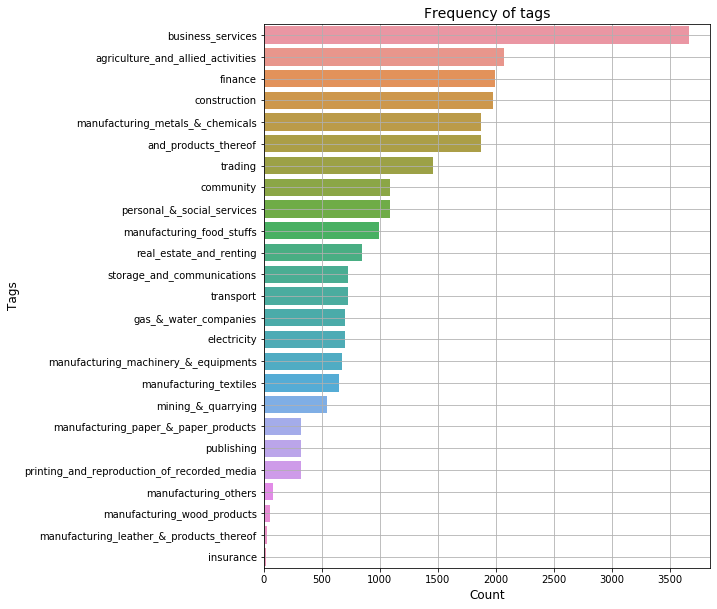

In [11]:

cnt_tags = pd.DataFrame(my_dict.items(), columns = ["tags", "count"])
cnt_tags.sort_values(["count"],  ascending=False, inplace=True)
cnt_tags.reset_index(drop=True, inplace=True)

plt.figure(figsize = (8,10))
sns.barplot(x = 'count', y = 'tags', data = cnt_tags)
plt.title('Frequency of tags', fontsize = 14)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Tags', fontsize = 12)
plt.grid(1)
plt.show()